# Felipe Melo

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [10]:
df_consumption = pd.read_csv(r'consumo_cerveja_sp.csv').set_index('Data').replace(',', '.', regex=True).astype(float).dropna()
df_consumption.index = pd.to_datetime(df_consumption.index)

[Text(0.5, 1.0, 'Consumo Mensal de Cerveja SP (2015)')]

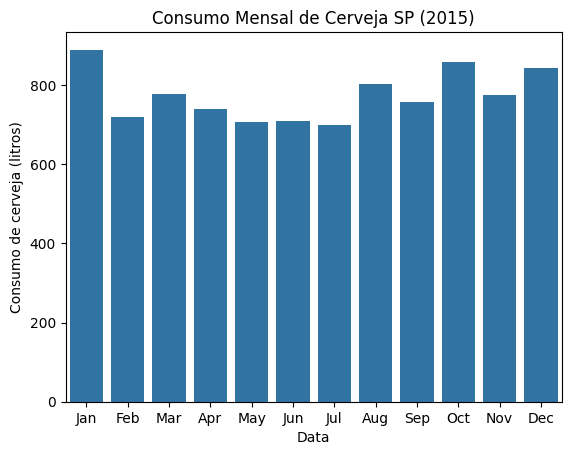

In [11]:
# Cria barplot do consumo mensal de cerveja
consumo_mensal = df_consumption.resample('ME').sum()
consumo_mensal

consumo_mensal.index = consumo_mensal.index.strftime('%b')
sns.barplot(data=consumo_mensal, x=consumo_mensal.index, y='Consumo de cerveja (litros)').set(title='Consumo Mensal de Cerveja SP (2015)')

In [62]:
# Calcula aumento de consumo de cerveja no final de semana
cons_fds = df_consumption.groupby('Final de Semana')['Consumo de cerveja (litros)'].mean()
cons_fds = pd.DataFrame(cons_fds)
cons_fds.pct_change()

,Consumo de cerveja (litros)
Final de Semana,
0.0,NaN
1.0,0.205203


<Axes: >

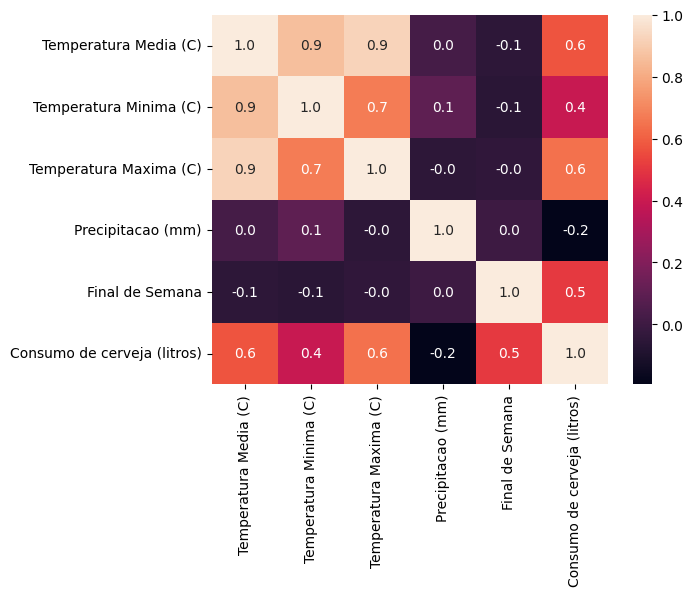

In [13]:
# Heatmap de correlação
sns.heatmap(df_consumption.corr(), annot=True, fmt='.1f')

<Axes: xlabel='Consumo de cerveja (litros)', ylabel='Temperatura Media (C)'>

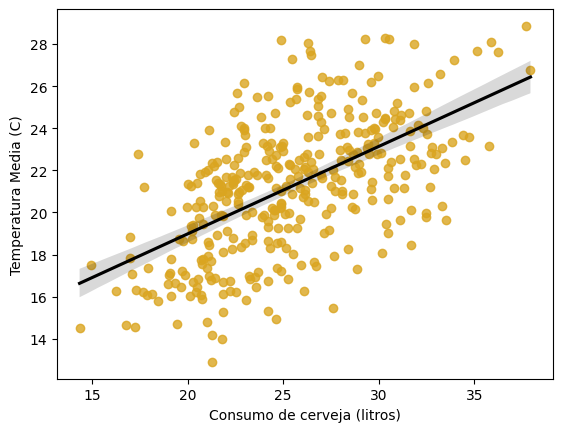

In [14]:
# Scatter plot Temp. Média x Consumo de Cerveja
sns.regplot(data=df_consumption, x='Consumo de cerveja (litros)', y='Temperatura Media (C)', scatter_kws=dict(color='goldenrod'),
            line_kws=dict(color="black"))

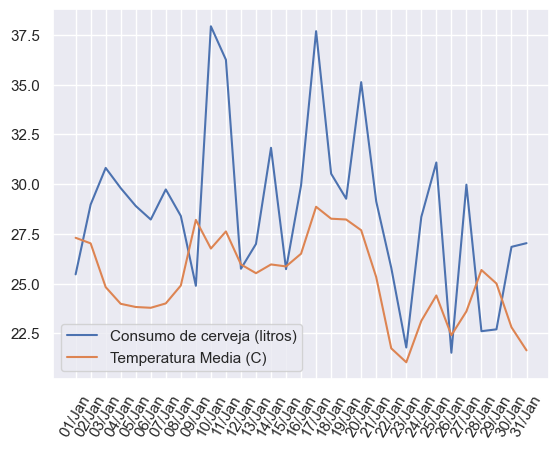

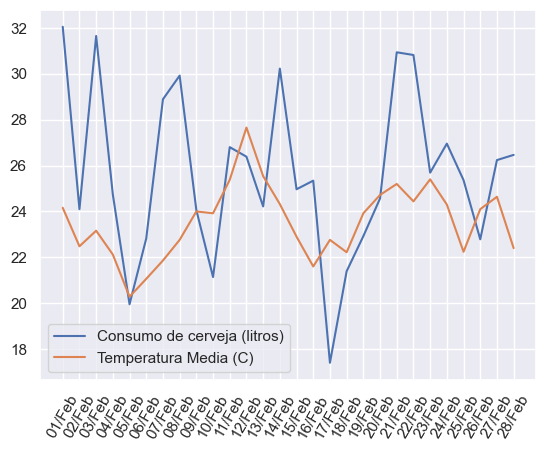

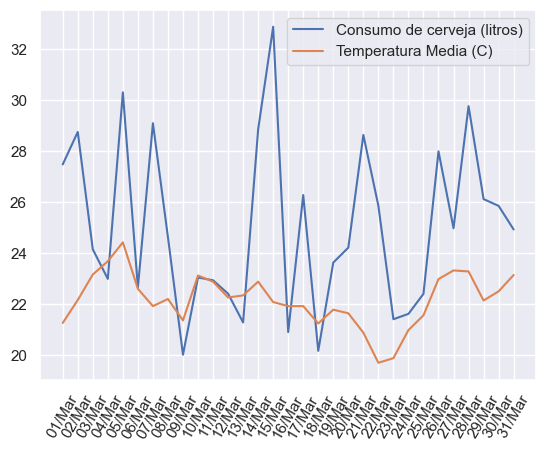

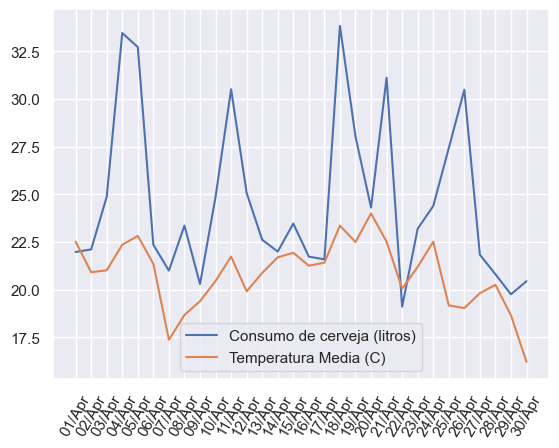

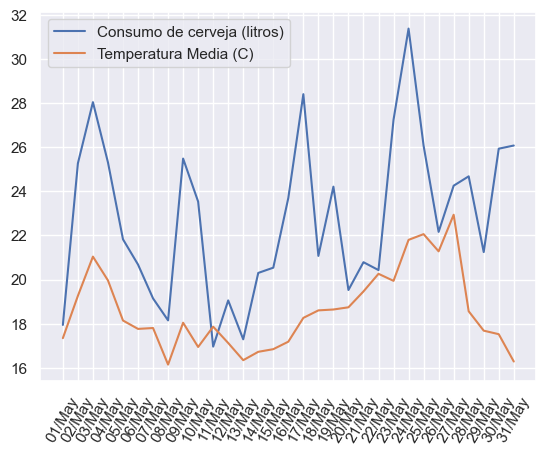

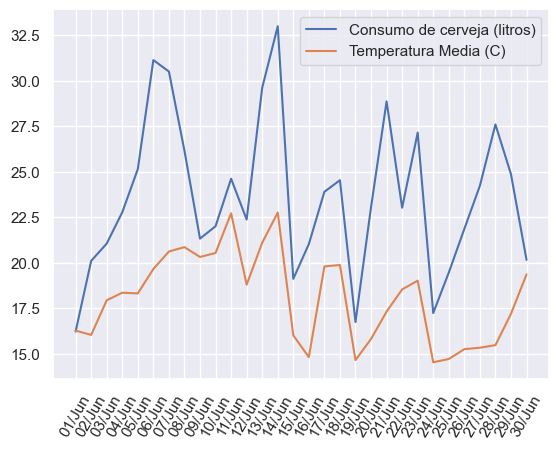

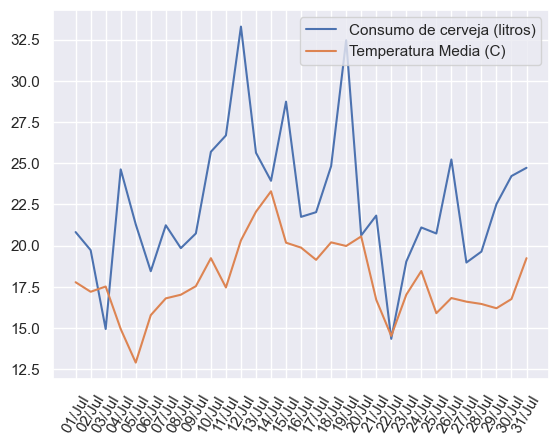

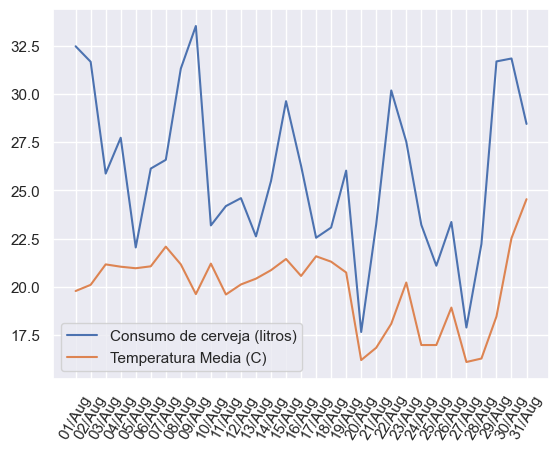

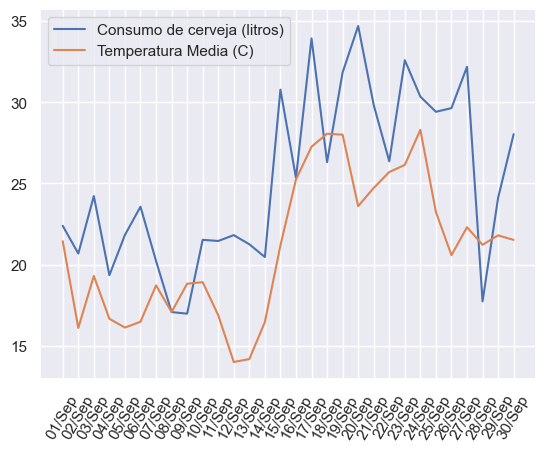

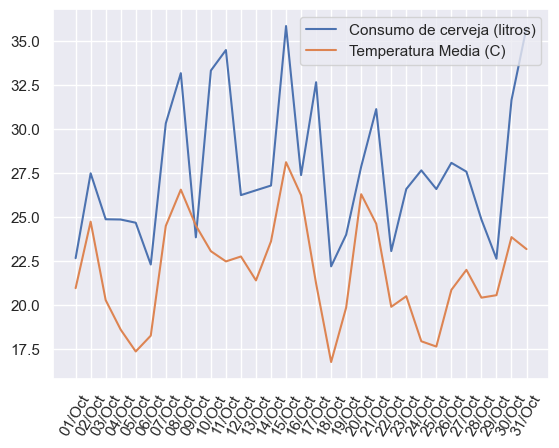

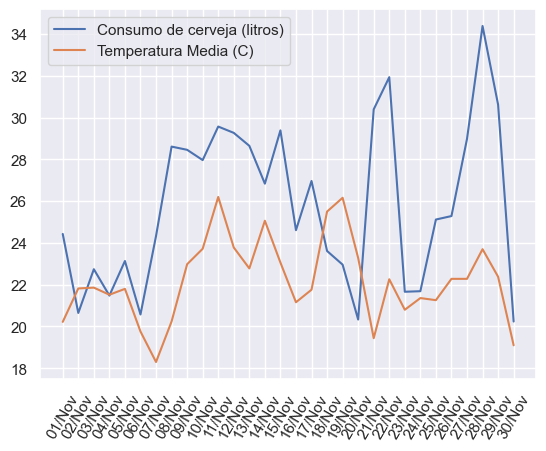

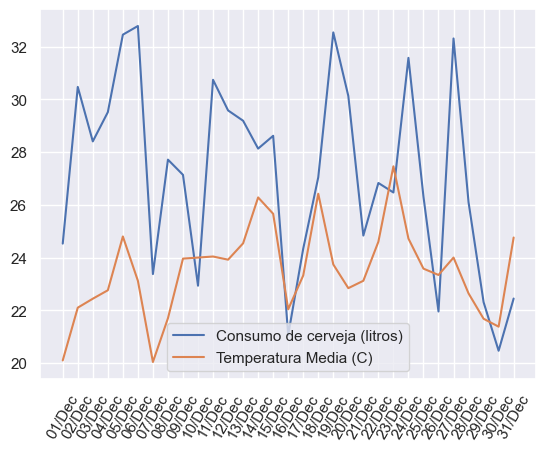

In [7]:
# Gráfico para entender relação da temperatura x consumo
df_consumption_monthly = {}
for month, group in df_consumption.groupby(df_consumption.index.month):
    df_consumption_monthly[month] = group

for df in df_consumption_monthly:
    df_fig = df_consumption_monthly[df][['Consumo de cerveja (litros)', 'Temperatura Media (C)']]
    df_fig.index = df_fig.index.strftime('%d/%b')
    sns.set_theme('notebook')
    fig, ax = plt.subplots()
    ax.plot(df_fig)
    ax.set_xticks(df_fig.index)
    ax.set_xticklabels(df_fig.index, rotation=60)
    plt.legend(df_fig.columns)
    plt.show()

# Guigas

In [63]:
format((cons_fds.iloc[1]/cons_fds.iloc[0] - 1).iloc[0], '.2%')

'20.52%'

In [66]:
df_mensal = df_consumption.resample('ME').mean()
px.line(df_mensal, x=df_mensal.index, y=['Temperatura Maxima (C)', 'Consumo de cerveja (litros)'], title='Consumo de Cerveja X Temperatura Máxima (Mensal - 2015)')